<a href="https://colab.research.google.com/github/19rehan/Deep-learning/blob/main/Concrete_Compressive_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data load karein (Concrete strength dataset)
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

# Pehli 5 rows check karein
print(concrete_data.head())

# Check karein kitni rows aur columns hain
print(concrete_data.shape)

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
(1030, 9)


In [ ]:
# 1. Check for null values
print(concrete_data.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


In [3]:
# 2. Divide into Predictors (X) and Target (y)
concrete_data_column = concrete_data.columns

In [4]:
# Target ko chor kar baqi sab predictors hain
predictor = concrete_data[concrete_data_column[concrete_data_column != 'Strength']]
target = concrete_data['Strength']

In [5]:
# Predictors ke columns ki tadad save karein (Model ko batane ke liye)
n_cols = predictor.shape[1]
print(f"Number of input features: {n_cols}")

Number of input features: 8


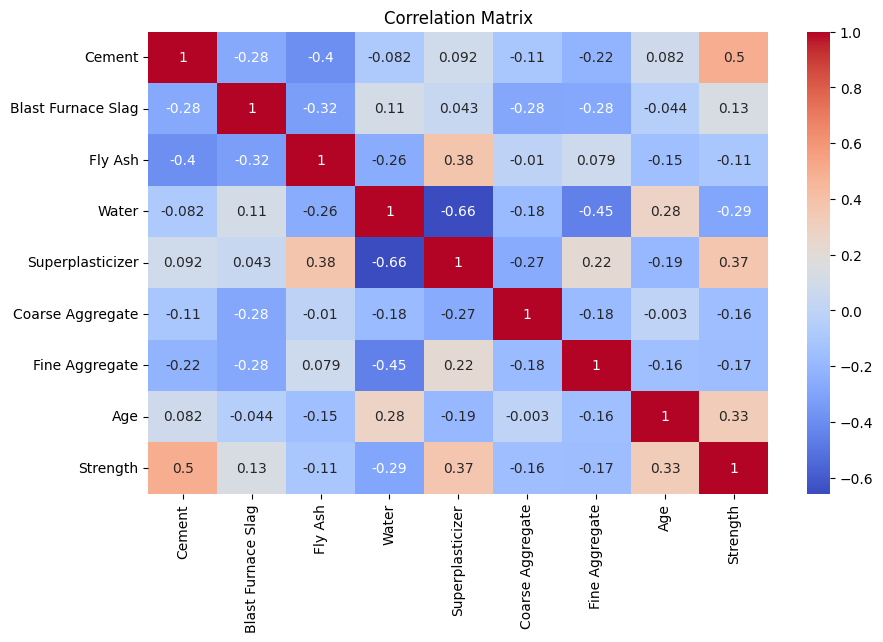

Data Skewness:
 Cement                0.509481
Blast Furnace Slag    0.800717
Fly Ash               0.537354
Water                 0.074628
Superplasticizer      0.907203
Coarse Aggregate     -0.040220
Fine Aggregate       -0.253010
Age                   3.269177
dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Check (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(concrete_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 2. Skewness Check
print("Data Skewness:\n", predictor.skew())


In [11]:
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


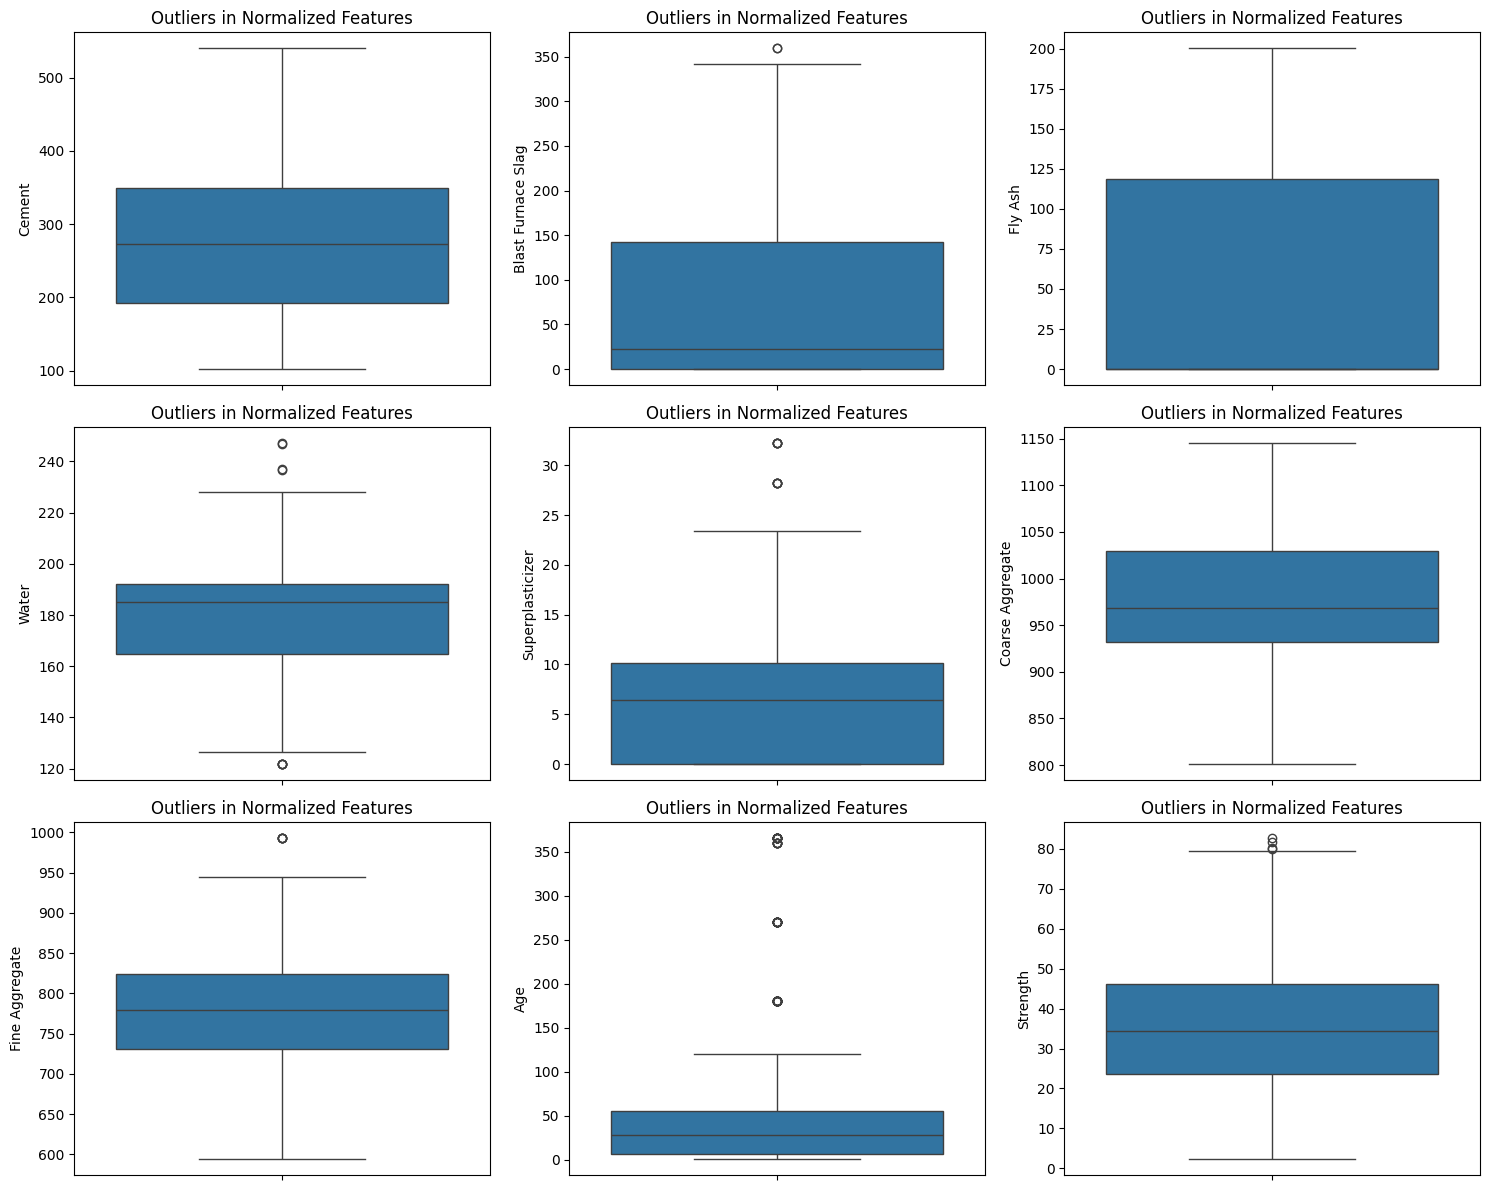

In [17]:
# 3. Outliers Check (Boxplot)

outlier_check =['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

plt.figure(figsize=(15,12))

for i, col in enumerate(outlier_check):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=concrete_data[col])
    plt.title("Outliers in Normalized Features")
plt.tight_layout()
plt.show()

In [21]:
concrete_data['Superplasticizer'].max()

32.2

In [26]:
outlier_check =['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

for i in outlier_check:
  print(concrete_data[i].max())

540.0
359.4
200.1
247.0
32.2
1145.0
992.6
365
82.6


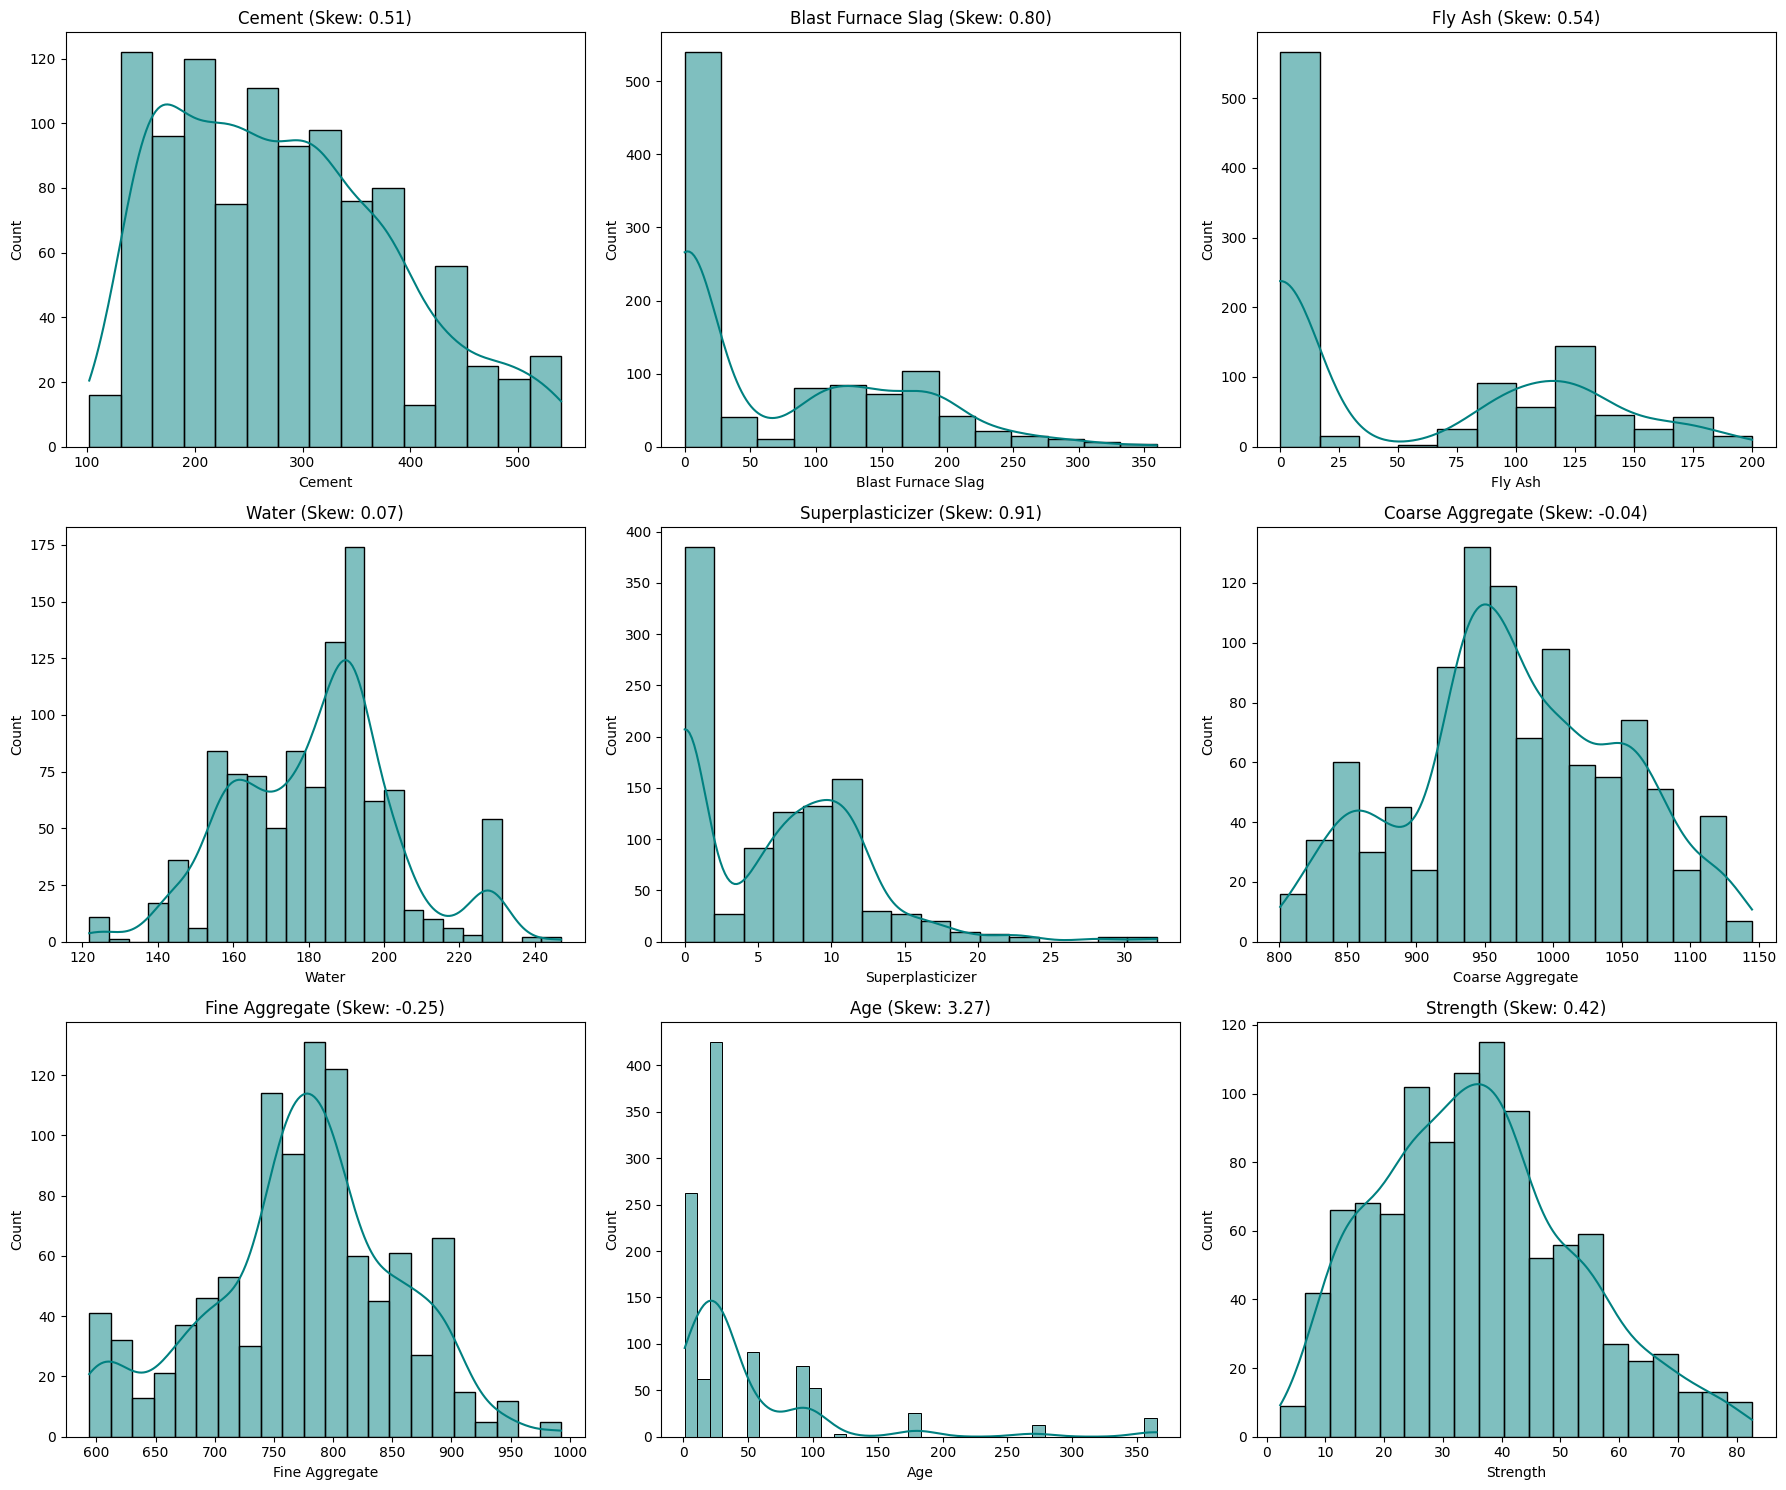

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
            'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

# 3x3 Grid banayein
plt.figure(figsize=(18, 15))

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)

    # Histogram with Kernel Density Estimate (KDE)
    sns.histplot(concrete_data[col], kde=True, color='teal')

    # Skewness calculate karke title mein likhein
    skew_val = concrete_data[col].skew()
    plt.title(f"{col} (Skew: {skew_val:.2f})")

plt.tight_layout()
plt.show()

In [28]:
# Age ki skewness khatam karne ke liye Log apply karein
concrete_data['Age'] = np.log1p(concrete_data['Age']) # log1p handle karta hai agar value 0 ho

print(f"New Skewness of Age: {concrete_data['Age'].skew():.2f}")

New Skewness of Age: -0.01


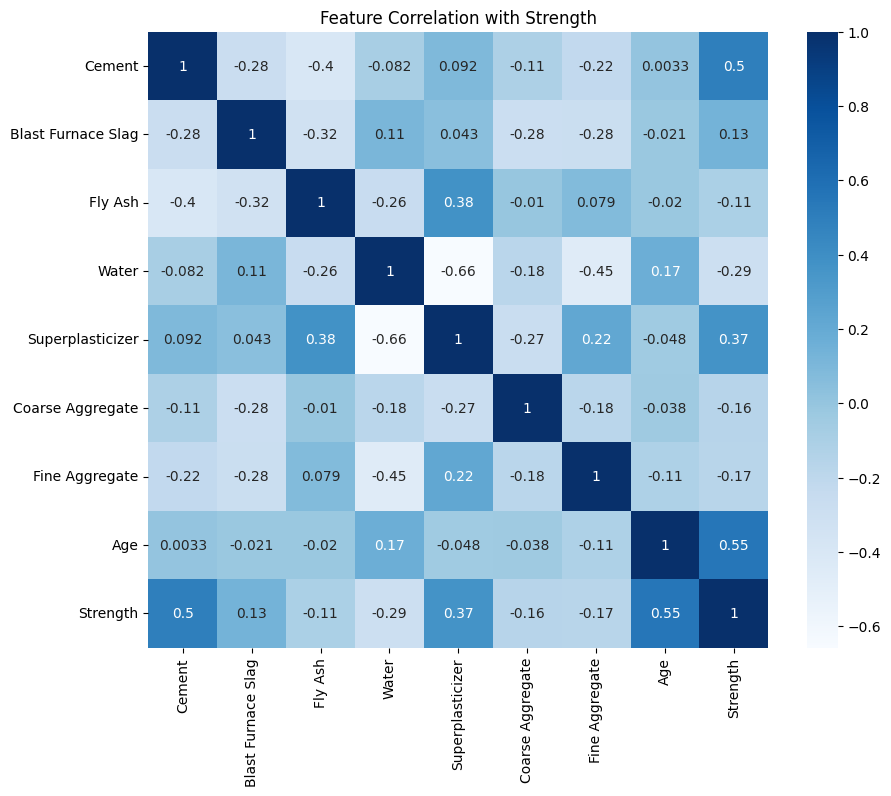

In [29]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(concrete_data.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation with Strength")
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor)

In [34]:
scaled_data = pd.DataFrame(scaled_data, columns=predictor.columns)

n_cols = scaled_data.shape[1]
print(f"Number of input features: {n_cols}")

Number of input features: 8


In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


print("Model Architecture is Ready")

Model Architecture is Ready


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
history = model.fit(scaled_data, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 3s - 146ms/step - loss: 1731.3795 - val_loss: 1243.4911
Epoch 2/100
23/23 - 1s - 39ms/step - loss: 1707.0211 - val_loss: 1227.0255
Epoch 3/100
23/23 - 0s - 14ms/step - loss: 1684.8456 - val_loss: 1211.9619
Epoch 4/100
23/23 - 0s - 10ms/step - loss: 1662.7714 - val_loss: 1195.3171
Epoch 5/100
23/23 - 0s - 13ms/step - loss: 1636.1559 - val_loss: 1176.3940
Epoch 6/100
23/23 - 0s - 11ms/step - loss: 1603.5902 - val_loss: 1152.2075
Epoch 7/100
23/23 - 0s - 11ms/step - loss: 1559.8392 - val_loss: 1121.8921
Epoch 8/100
23/23 - 0s - 7ms/step - loss: 1503.4385 - val_loss: 1084.2632
Epoch 9/100
23/23 - 0s - 6ms/step - loss: 1434.9246 - val_loss: 1037.3643
Epoch 10/100
23/23 - 0s - 6ms/step - loss: 1352.4884 - val_loss: 983.3936
Epoch 11/100
23/23 - 0s - 6ms/step - loss: 1256.6731 - val_loss: 921.8404
Epoch 12/100
23/23 - 0s - 7ms/step - loss: 1148.2751 - val_loss: 853.0440
Epoch 13/100
23/23 - 0s - 6ms/step - loss: 1029.8707 - val_loss: 779.7655
Epoch 14/100
23/23 - 0s - 7ms/

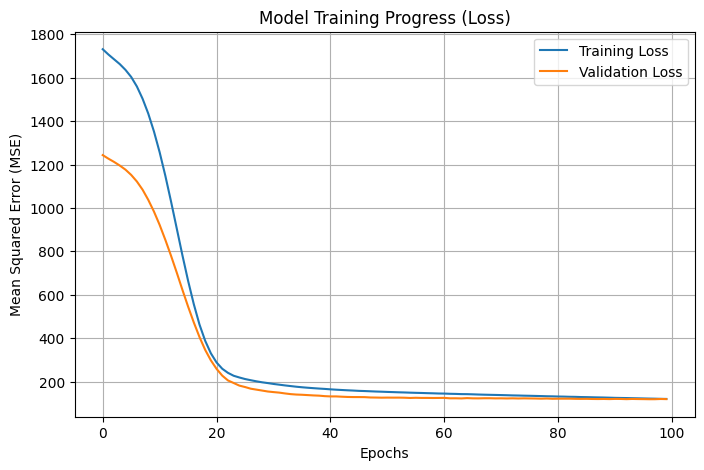

In [37]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()